# CSE428 Week 3 Coding Assignment

In [55]:
NAME = "Niloy Farhan"
ID = "20101118"
COLLABORATORS_ID = ["21241056", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [56]:
# Import libraries 

from skimage.io import imread, imshow
from skimage import img_as_float
from skimage import color
from skimage.util import pad
from skimage.util import random_noise
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


In [57]:
# Define helper functions

def plot_image(img, figsize = (6,6)):
    plt.figure(figsize = figsize)
    if len(img.shape) == 2:
        plt.imshow(img, cmap = "gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    print("Image shape = {}".format(img.shape))
    
def plot_kernel(kernel, cmap = "Reds"):
    plt.imshow(kernel, interpolation = "none", cmap = "Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape = {}".format(kernel.shape))

def gaussian_kernel(width=1, size = 10):
    gaussian1dkernel = signal.gaussian(size,width).reshape(size,1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2


## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


Image shape = (438, 438, 3)


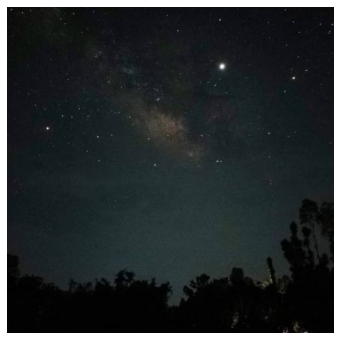

In [58]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = img_as_float(imread("Sample.jpg")) # TO-BE-COMPLETED
plot_image(image)

In [59]:
# Define a gaussian kernel of size (35, 35)

kernel = gaussian_kernel(35,35) # TO-BE-COMPLETED

In [60]:
# Determine the time to filter the image with the kernel using "direct" method

import time

start_time = time.time()   # Time.clock was removed in python 3.8, maybe this is why it was giving an error in my jupyter NB.

filetred_image_direct = np.zeros_like(image)
for i in range(image.shape[-1]):
    filetred_image_direct[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method= "direct" ) # TO-BE-COMPLETED
 
print("Time elapsed using direct method of correlation: ", time.time() - start_time, "seconds")

Time elapsed using direct method of correlation:  13.327311515808105 seconds


In [61]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.time() 
 
filetred_image_fft = np.zeros_like(image)
for i in range(image.shape[-1]):
    filetred_image_direct[:,:,i] = signal.correlate(image[:,:,i], kernel, mode='same', method= "fft" ) # TO-BE-COMPLETED
 
print("Time elapsed using fft method of correlation: ", time.time()  - start_time, "seconds")

Time elapsed using fft method of correlation:  0.05137157440185547 seconds


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

The direct method of correlation took 65.6281 seconds which is much higher than fft method of correlation which took only 0.2493 seconds. So, FFT method is much efficient in this case.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


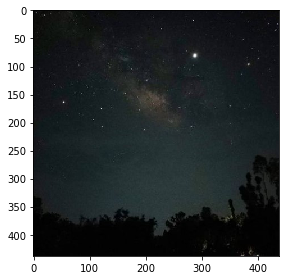

In [62]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = imread("Sample.jpg") # TO-BE-COMPLETED
image = image/255
imshow(image)

In [63]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = np.zeros((105,105)) # TO-BE-COMPLETED
for i in range(105):
    for j in range(105):
        kernel_symmetric[i][j] = i+j-104
        kernel_symmetric[i][j] = kernel_symmetric[i][j]/104

print(kernel_symmetric)

[[-1.         -0.99038462 -0.98076923 ... -0.01923077 -0.00961538
   0.        ]
 [-0.99038462 -0.98076923 -0.97115385 ... -0.00961538  0.
   0.00961538]
 [-0.98076923 -0.97115385 -0.96153846 ...  0.          0.00961538
   0.01923077]
 ...
 [-0.01923077 -0.00961538  0.         ...  0.96153846  0.97115385
   0.98076923]
 [-0.00961538  0.          0.00961538 ...  0.97115385  0.98076923
   0.99038462]
 [ 0.          0.00961538  0.01923077 ...  0.98076923  0.99038462
   1.        ]]


In [64]:
# Define any asymmetric kernel of size (105, 105)


kernel_asymmetric = np.random.randn(105,105) # TO-BE-COMPLETED
print(kernel_asymmetric)

[[ 1.2803646   0.47755303 -0.95551838 ...  0.27323153  0.25859169
  -1.67476347]
 [ 0.94621266  1.12351293 -1.2370554  ... -0.82702831 -1.14261502
   0.31151743]
 [ 0.18547877  1.03974247  1.03290398 ... -0.12966797 -0.24964891
  -0.45306169]
 ...
 [ 0.62334905  1.09197913 -0.5255865  ...  1.15505157  0.15234133
  -0.82108224]
 [ 1.77161909  1.01169516  0.58718623 ...  1.5790875   1.07744064
   0.7174802 ]
 [ 0.25114326  0.56326208  1.92097634 ... -1.96372068  0.38927427
  -0.69089447]]


In [65]:
# Filter the image with the symmetric kernel using the correlation function

for i in range(3):
    filtered_image_symmetric = signal.correlate(image[:,:,i], kernel_symmetric, mode = "same", method = "auto")# TO-BE-COMPLETED
    filtered_image_asymmetric = signal.correlate(image[:,:,i], kernel_asymmetric, mode = "same", method = "auto") # TO-BE-COMPLETED

(-0.5, 437.5, 437.5, -0.5)

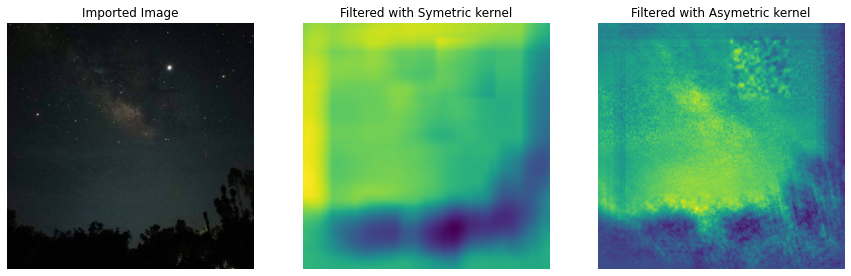

In [66]:
# Display the images side by side (with proper labeling, which is which)
plt.figure(figsize= (15,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(1,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Filtered with Symetric kernel")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Filtered with Asymetric kernel")
plt.axis("off")

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

With my imported image, filtering with symetric kernel produced something that is blurred and transition of colors are smooth. Meanwhile, Assymetric kernel produced something that doesn't make sense and transition of colors are rough.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

(-0.5, 437.5, 437.5, -0.5)

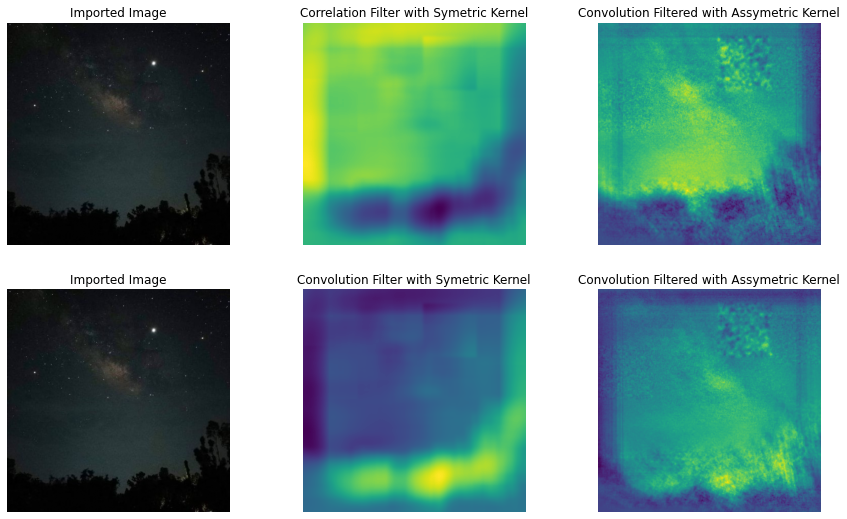

In [67]:
# Filter the image with the asymmetric kernel using the convolution function
for i in range(3):
    filtered_image_symmetric_C = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto')
    filtered_image_asymmetric_C = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto')
    
plt.figure(figsize= (15,9))
plt.subplot(2,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Correlation Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Convolution Filtered with Assymetric Kernel")
plt.axis("off")
plt.subplot(2,3,4)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,5)
plt.imshow(filtered_image_symmetric_C)
plt.title("Convolution Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(filtered_image_asymmetric_C)
plt.title("Convolution Filtered with Assymetric Kernel")
plt.axis("off")

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

With my imported image, filtering with symetric kernel produced something that is blurred and transition of colors are smooth. Meanwhile, Assymetric kernel produced something that doesn't make sense and transition of colors are rough.

Since, convolution is one kind of correlation where Kernel is transposed, Convolution of Symetric kernel produced same effect but in inverse of the filtered by correlation symetric kernel. But on the case of assymetric filtering, we do not see this inverse effect with assymetric kernel.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [68]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread("diamond2.jpg") # TO-BE-COMPLETED
image = image/255
image = color.rgb2gray(image)


In [69]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[-4, -2, 0], # TO-BE-COMPLETED
                     [-2, 0, 2], # TO-BE-COMPLETED
                     [0, 2, 4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -2, -4], # TO-BE-COMPLETED
                     [2, 0, -2], # TO-BE-COMPLETED
                     [4, 2, 0]]) # TO-BE-COMPLETED

(-0.5, 625.5, 625.5, -0.5)

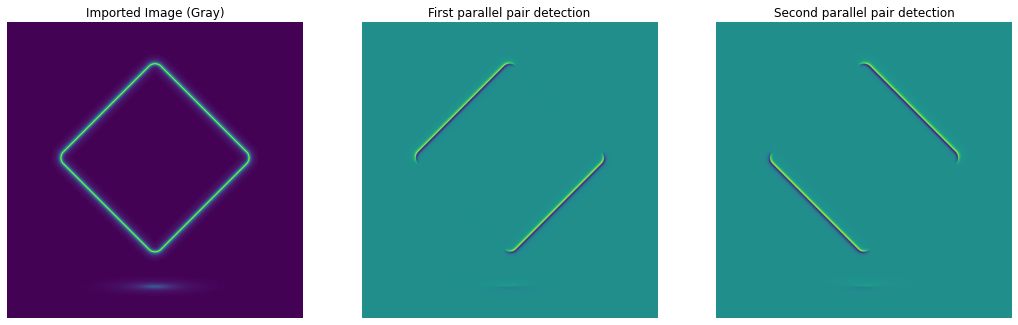

In [70]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.correlate(image, kernel_1, mode = 'same', method = 'auto') # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected =signal.correlate(image, kernel_2, mode = 'same', method = 'auto')  # TO-BE-COMPLETED

# plot the two filtered images side by side

plt.figure(figsize= (18,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image (Gray)")
plt.subplot(1,3,2)
plt.imshow(first_pair_detected)
plt.title("First parallel pair detection")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(second_pair_detected)
plt.title("Second parallel pair detection")
plt.axis("off")

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?

I used Sobel mask for diagonal edge detection. I did not use prewitt because sobel masks have slightly superior noise-suppression charactersics. Then I tweaked the coefficients and was getting weird outputs. My kernels are not unique and there can be other kernels like prewitt and Adibs kernel which can accomplish the same task.

## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


Image shape = (1012, 1012, 3)


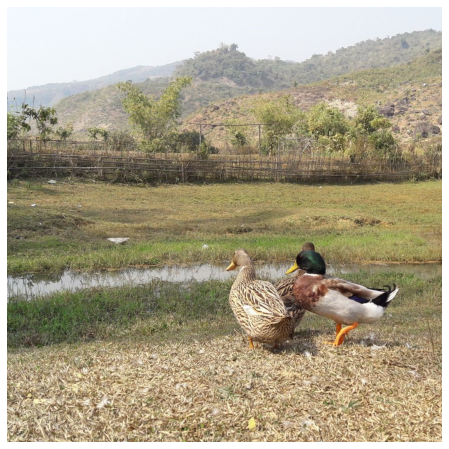

In [71]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image = imread("something.jpg") # TO-BE-COMPLETED
image = image
plot_image(image, figsize=(8,8))

Image shape = (1012, 1012, 3)


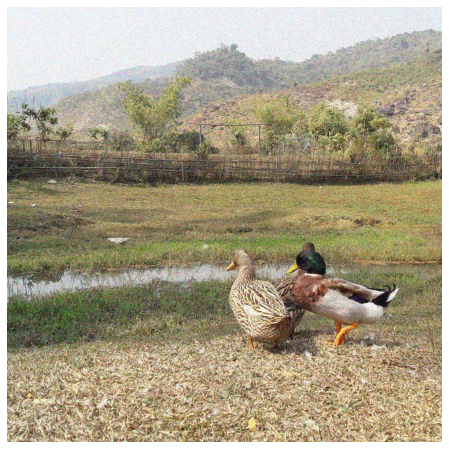

In [72]:
# corrupt the original image

image_noisy = random_noise(image, mode = "gaussian", var = 0.01) # TO-BE-COMPLETED
plot_image(image_noisy, figsize=(8,8))

In [73]:
# import the bilateral filter

# from skimage.restoration import None # TO-BE-COMPLETED
from skimage.restoration import denoise_bilateral
# import the total variation denoising filter

# from skimage.restoration import None # TO-BE-COMPLETED
from skimage.restoration import denoise_tv_chambolle

In [74]:
# clean the image using TVD

image_denoised_tvd = denoise_tv_chambolle(image_noisy, weight = 0.1, multichannel= True) # TO-BE-COMPLETED

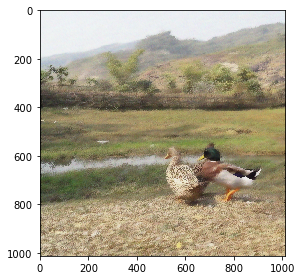

In [75]:
# clean the image using BF

image_denoised_bf = denoise_bilateral(image_noisy, sigma_color= 0.1, sigma_spatial= 3, multichannel= True) # TO-BE-COMPLETED
imshow(image_denoised_bf)

(-0.5, 1011.5, 1011.5, -0.5)

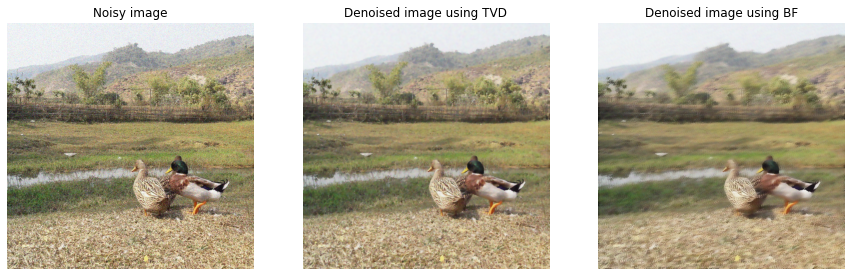

In [76]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot
plt.figure(figsize= (15,6))
plt.subplot(1,3,1)
plt.imshow(image_noisy)
plt.axis("off")
plt.title("Noisy image")
plt.subplot(1,3,2)
plt.imshow(image_denoised_tvd)
plt.title("Denoised image using TVD")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(image_denoised_bf)
plt.title("Denoised image using BF")
plt.axis("off")

In [77]:
# compute the MSE
from sklearn.metrics import mean_squared_error
mse_tvd = 0
mse_bf = 0
mse_tvd = mean_squared_error(image.ravel(),image_denoised_tvd.ravel()) # TO-BE-COMPLETED
mse_bf =  mean_squared_error(image.ravel(),image_denoised_bf.ravel())  # TO-BE-COMPLETED
    
print("MSE of TVD is {} \nMSE of BF is {}".format(mse_tvd,mse_bf))

MSE of TVD is 25158.59332841709 
MSE of BF is 25158.5619105211


### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result?

Qualitatively, denoised image using TVD is better than denoised image using BF. Because, denoised image using BF looks blurry. Assuming that I correctly calculated MSE, both of the MSE is quite bad with very minimal difference. But, MSE of TVD is 0.03 more than MSE of BF. I tweaked sigma_color, sigma_spatial of  denoise_bilateral() function. Increasing sigma_color and sigma_spatial produced a more noise free but blurier image (Looked like waterpainting). I found sigma_color= 0.1, sigma_spatial= 3 best in this case.

## **The END**